In [1343]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [1265]:
import warnings
warnings.filterwarnings('ignore')

In [1266]:
orders = pd.read_csv('Orders.csv')
returns = pd.read_csv('Returns.csv')

In [1267]:
returns = returns.drop('Region', 1)

In [1268]:
orders.shape

(51290, 24)

In [1269]:
returns.shape

(1079, 2)

In [1270]:
orders['Profit'] = orders['Profit'].str.replace('$','')
orders['Profit'] = orders['Profit'].str.replace(',','')
orders['Sales'] = orders['Sales'].str.replace('$','')
orders['Sales'] = orders['Sales'].str.replace(',','')
returns.rename(columns={'Order ID': 'Order.ID'}, inplace=True)

In [1271]:
pd.to_numeric(orders.Profit)
pd.to_numeric(orders.Sales)

0         221.98
1        3709.40
2        5175.17
3        2892.51
4        2832.96
          ...   
51285      65.10
51286      16.72
51287       8.56
51288      13.44
51289      61.38
Name: Sales, Length: 51290, dtype: float64

### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.


In [1272]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])
orders['Ship.Date'] = pd.to_datetime(orders['Ship.Date'])

In [1273]:
orders['OrderMonth'] = pd.DatetimeIndex(orders['Order.Date']).month
orders['OrderYear'] = pd.DatetimeIndex(orders['Order.Date']).year

In [1274]:
# orders = orders.drop_duplicates(subset=['Order.ID'])

In [1275]:
ordersByYearMonth = orders.groupby(["OrderMonth","OrderYear"])["Quantity"].sum()
ordersByMonth = orders.groupby("OrderMonth")["Quantity"].sum()

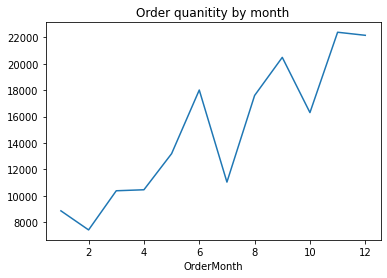

In [1276]:
ordersByMonth.plot(title = 'Order quanitity by month');

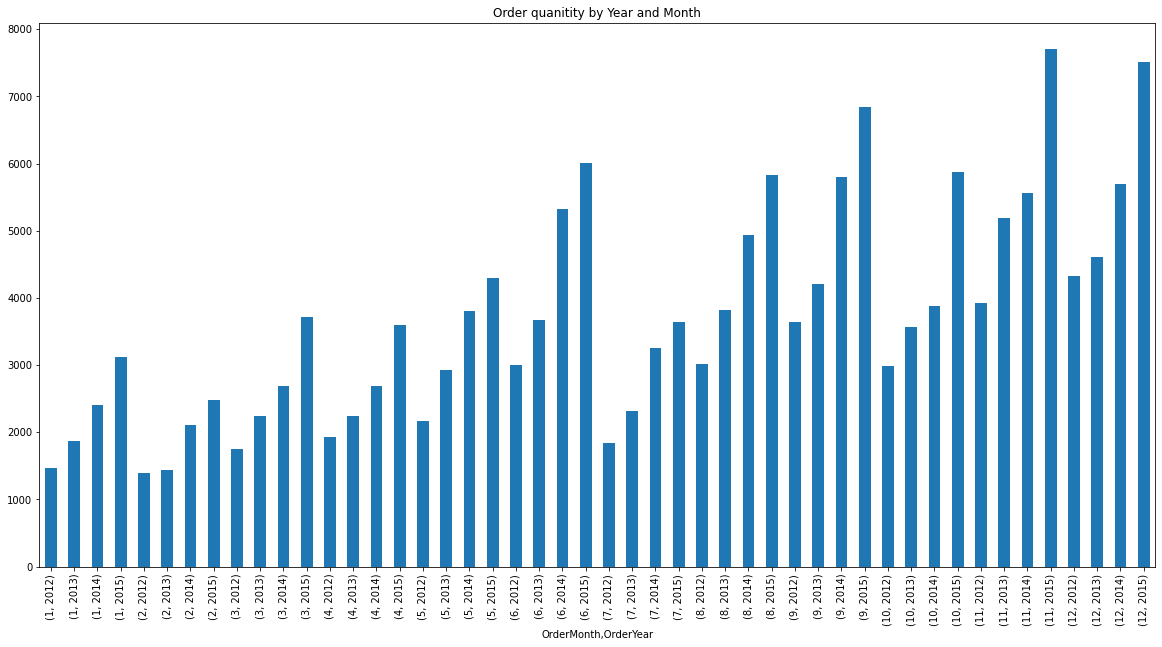

In [1277]:
ordersByYearMonth.plot.bar(title = 'Order quanitity by Year and Month',figsize=(20,10));

In [1278]:
order_category_volume_by_month = orders.groupby(['OrderMonth','Category'])['Quantity'].sum()

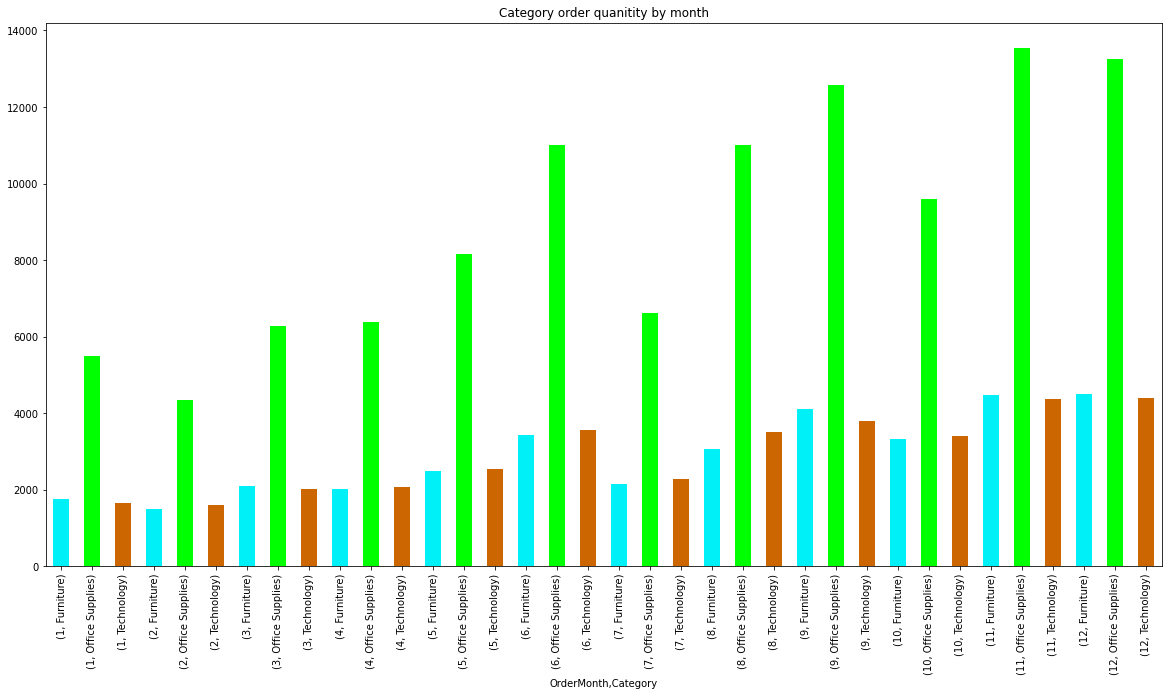

In [1279]:
order_category_volume_by_month.plot.bar(figsize=(20,10),color=['#00F0F8FF', '#00ff00', '#cc6600'],title='Category order quanitity by month');

In [1280]:
# orders = pd.merge(orders, returns, on = 'Order.ID')
orders = orders.merge(returns,how='left', left_on='Order.ID', right_on='Order.ID')

In [1281]:
orders.groupby(['OrderYear','Returned'])['Profit'].sum()

OrderYear  Returned
2012       Yes         720.36153.75311.85390.60258.90-0.03-135.14114....
2013       Yes         -286.92-1331.65191.3240.95391.77473.91124.79-5...
2014       Yes         7.85587.19139.320.00593.91460.62573.121163.888...
2015       Yes         858.90296.66444.48-348.52714.00287.92-1303.067...
Name: Profit, dtype: object

In [1282]:
orders['Returned_Filled'] = orders['Returned'].fillna('No')

In [1283]:
orders['Profit'] = orders['Profit'].str.replace('$','')
orders['Profit'] = orders['Profit'].str.replace(',','')

In [1284]:
orders.Profit = pd.to_numeric(orders.Profit)

In [1285]:
orders.Profit

0         62.15
1       -288.77
2        919.97
3        -96.54
4        311.52
          ...  
51285      4.50
51286      3.34
51287      2.48
51288      2.40
51289      1.80
Name: Profit, Length: 51290, dtype: float64

In [1286]:
custReturnByYear = orders.groupby(['OrderYear','Returned'])[['Profit']].sum()

In [1287]:
customers_return = orders.groupby(['Customer.ID'])[['Returned']].count()

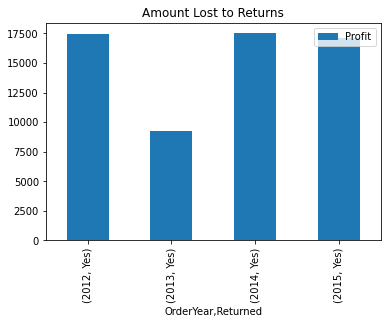

In [1288]:
custReturnByYear.plot.bar(title='Amount Lost to Returns');

In [1289]:
return_vals = customers_return.value_counts()

In [1290]:
return_vals

Returned
0           16354
1             514
2             253
3             154
4              60
5              34
6              20
7              14
8               6
9               2
10              2
11              1
13              1
dtype: int64

In [1291]:
return_vals[2:].sum()
# 547 customers

547

In [1292]:
return_vals[6:].sum()
# 46 customers

46

In [1293]:
orders.Region

0             Central US
1                Oceania
2                Oceania
3         Western Europe
4         Western Africa
              ...       
51285       Eastern Asia
51286        Southern US
51287         Western US
51288      South America
51289    Central America
Name: Region, Length: 51290, dtype: object

In [1294]:
# region_tot = orders.Region.value_counts()

In [1295]:
regionReturned = orders.groupby('Region').agg({'Returned': 'count'})

In [1296]:
regionTotal = orders.groupby('Region').agg({'Sales': 'count'})

In [1297]:
regionCombined = regionReturned.merge(regionTotal,left_on='Region',right_on='Region')

In [1298]:
regionCombined['Ratio'] = regionCombined['Returned'] / regionCombined['Sales']

In [1299]:
regionCombined.sort_values('Ratio',ascending=False)

,Returned,Sales,Ratio
Region,,,
Western US,177,3203,0.055261
Eastern Asia,131,2374,0.055181
Southern Europe,112,2113,0.053005
Southern Africa,25,478,0.052301
Southern US,83,1620,0.051235
Eastern US,134,2848,0.047051
Southeastern Asia,140,3129,0.044743
South America,133,2988,0.044511
Western Asia,108,2440,0.044262


In [1300]:
subCatReturned = orders.groupby('Sub.Category').agg({'Returned': 'count'})

In [1301]:
subCatTotal = orders.groupby('Sub.Category').agg({'Sales': 'count'})

In [1302]:
subCatCombined = subCatReturned.merge(subCatTotal,left_on='Sub.Category',right_on='Sub.Category')

In [1303]:
subCatCombined['Ratio'] = subCatCombined['Returned'] / subCatCombined['Sales']
subCatCombined.sort_values('Ratio',ascending=False)

,Returned,Sales,Ratio
Sub.Category,,,
Labels,137,2601,0.052672
Tables,41,861,0.047619
Accessories,138,3075,0.044878
Art,217,4864,0.044613
Copiers,99,2223,0.044534
Binders,269,6146,0.043768
Phones,145,3357,0.043193
Bookcases,104,2411,0.043136
Paper,150,3492,0.042955


In [1304]:
orders['Returned_Encoded'] = orders['Returned_Filled'].map(lambda x: 0 if x == 'No' else 1)

In [1305]:
orders.Returned_Encoded.value_counts()

0    49070
1     2220
Name: Returned_Encoded, dtype: int64

In [1306]:
orders['Process.Time'] = orders['Ship.Date'] - orders['Order.Date']

In [1307]:
prodReturnCount = orders.groupby('Product.ID').agg({'Returned_Encoded': 'count'})

In [1308]:
prodReturnCount.sort_values(by='Returned_Encoded',ascending=False)

,Returned_Encoded
Product.ID,
OFF-FA-6129,227
OFF-BI-3737,92
OFF-ST-4057,90
OFF-ST-5693,84
OFF-BI-4828,83
...,...
TEC-AC-5281,1
OFF-AR-4795,1
TEC-AC-5213,1


In [1309]:
prodReturnCount = prodReturnCount.reset_index()

In [1310]:
prodReturnCount['Return_Count'] = prodReturnCount['Returned_Encoded']

In [1311]:
prodReturnCount = prodReturnCount.drop('Returned_Encoded', 1)

In [1312]:
orders = orders.merge(prodReturnCount,on='Product.ID')

In [1313]:
orders.sort_values(by='Return_Count', ascending=True)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Profit,Shipping.Cost,Order.Priority,OrderMonth,OrderYear,Returned,Returned_Filled,Returned_Encoded,Process.Time,Return_Count
51289,31316,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,16.01,14.75,High,8,2012,NaN,No,0,5 days,1
49240,40752,CA-2014-JL15175140-41807,2014-06-17,2014-06-20,Second Class,JL-151751408,James Lanier,Home Office,37421.0,Chattanooga,...,-1.83,10.93,Medium,6,2014,NaN,No,0,3 days,1
49317,37578,CA-2013-JK15205140-41598,2013-11-20,2013-11-26,Standard Class,JK-152051406,Jamie Kunitz,Consumer,43302.0,Marion,...,9.57,3.82,Medium,11,2013,NaN,No,0,6 days,1
23655,25588,IN-2012-GH1448558-41191,2012-10-09,2012-10-15,Standard Class,GH-1448558,Gene Hale,Corporate,NaN,Visakhapatnam,...,94.44,60.78,Medium,10,2012,NaN,No,0,6 days,1
23048,40753,CA-2015-BW11110140-42152,2015-05-28,2015-06-04,Standard Class,BW-111101408,Bart Watters,Corporate,27405.0,Greensboro,...,0.34,1.11,Low,5,2015,NaN,No,0,7 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,33177,CA-2013-LF17185140-41338,2013-03-05,2013-03-05,Same Day,LF-171851406,Luke Foster,Consumer,10011.0,New York City,...,14.67,5.00,Critical,3,2013,NaN,No,0,0 days,227
550,39202,US-2013-LS16975140-41562,2013-10-15,2013-10-22,Standard Class,LS-169751402,Lindsay Shagiari,Home Office,75217.0,Dallas,...,1.67,1.23,Medium,10,2013,NaN,No,0,7 days,227
549,37196,CA-2015-LS16945140-42017,2015-01-13,2015-01-17,Standard Class,LS-169451404,Linda Southworth,Corporate,94110.0,San Francisco,...,4.89,1.42,Medium,1,2015,NaN,No,0,4 days,227
562,31331,CA-2015-MA17560140-42297,2015-10-20,2015-10-24,Second Class,MA-175601402,Matt Abelman,Home Office,77095.0,Houston,...,9.95,3.50,Medium,10,2015,NaN,No,0,4 days,227


In [1314]:
orders['Product.ID'].value_counts()

OFF-FA-6129    227
OFF-BI-3737     92
OFF-ST-4057     90
OFF-ST-5693     84
OFF-BI-4828     83
              ... 
TEC-MA-4595      1
TEC-MA-4801      1
FUR-TA-3347      1
OFF-AP-3370      1
TEC-PH-5537      1
Name: Product.ID, Length: 3788, dtype: int64

In [1315]:
orders['Process.Time'] = orders['Process.Time'].dt.days

In [1378]:
features =  orders[['Ship.Mode','Segment', 'Region', 'Sub.Category', 'Shipping.Cost','Quantity', 
                        'Discount', 'Order.Priority', 'OrderMonth', 'Process.Time','Returned_Encoded','Return_Count']]

In [1379]:
dummies = pd.get_dummies(features[['Ship.Mode','Region','Sub.Category','Order.Priority','OrderMonth','Process.Time']],drop_first=True)

In [1380]:
X = dummies
Y = features['Returned_Encoded']
Y.value_counts()

0    49070
1     2220
Name: Returned_Encoded, dtype: int64

In [1393]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [1394]:
logistic = LogisticRegression(random_state=0)

In [1395]:
logistic.fit(trainX,trainY)
logistic.score(trainX,trainY)

0.9573259894716319

In [1396]:
# Haven't got this down
confusion_matrix(Y,logistic.predict(X))

ValueError: X has 46 features, but LogisticRegression is expecting 47 features as input.